# Dynamic relationship of Brent-gasoline CZ using vector autoregressions

This notebook shows dynamic model of relationship between Brent and CZ gasol. For this purpose var model is used, together with analysis of optimal number of lags using Akaike information criterion.

Used data are from widely available sources.

In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

from pandas import read_excel

In [2]:
df = read_excel('cz_gasol_lr.xlsx', sheet_name ='LR commodities')
df.set_index(df['Date'],inplace=True)
df.index = pd.to_datetime(df.index).date

del df['Date']
df=df.dropna()

df

,Gasoline Czech Republic,Brent
2010-01-01,1.1200,584.17
2010-02-01,1.1700,565.92
2010-03-01,1.2300,603.72
2010-04-01,1.2600,649.22
2010-05-01,1.2700,587.05
...,...,...
2020-03-01,1.1000,264.83
2020-04-01,0.9498,221.05
2020-05-01,0.9548,247.78
2020-06-01,0.9916,306.32


In [3]:
df=df.diff().dropna()   #Because I(O) are not stationary, as was shown in previous notebook, I(1) is needed

C:\Users\Marek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


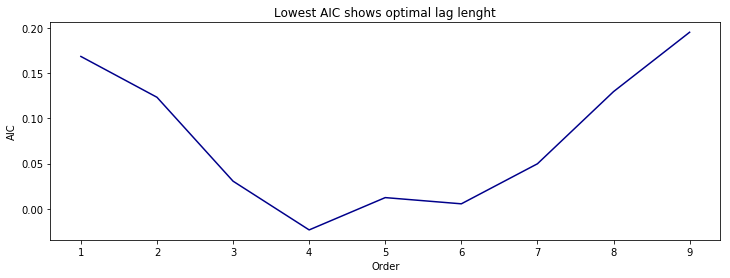

In [4]:
train = df.iloc[:-6,:]   
test = df.iloc[-6:,:]       #Lenght of test data can be choosen differently

forecasting_model = VAR(train)
results_aic = []

for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)
 
pyplot.plot(list(np.arange(1,10,1)), results_aic,color="darkblue")
pyplot.xlabel("Order")
pyplot.ylabel("AIC")
pyplot.title("Lowest AIC shows optimal lag lenght")
pyplot.gcf().set_size_inches((12, 4))
pyplot.show()

In [5]:
results = forecasting_model.fit(4)     #Lag lenght is 4 according to the previous lowest AIC criterion
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Jun, 2021
Time:                     14:05:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.403856
Nobs:                     116.000    HQIC:                  0.150026
Log likelihood:          -309.835    FPE:                   0.977457
AIC:                   -0.0234256    Det(Omega_mle):        0.841771
--------------------------------------------------------------------
Results for equation Gasoline Czech Republic
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              0.001228         0.002587            0.475           0.635
L1.Gasoline Czech Republic        -0.118998         0.099707           -1.193       

<Figure size 864x288 with 0 Axes>

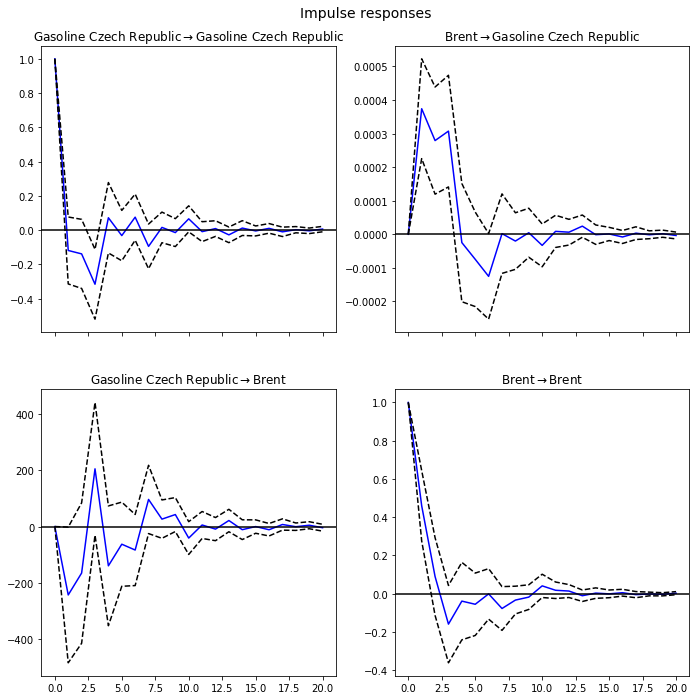

In [9]:
irf = results.irf(20)

fig=pyplot.figure(figsize=(12,4))
fig=irf.plot(orth=False)

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, author has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, freely availible at the time of publication. Author makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.